
**************************************************
Exploration: (pair: [0, 4], episode: 0)
Player[0]: {type: X, preference: A1, action: A2}
Player[1]: {type: X, preference: A1, action: None}
Player[2]: {type: X, preference: A1, action: None}
Player[3]: {type: X, preference: A1, action: None}
Player[4]: {type: X, preference: A1, action: A1}
Player[5]: {type: Y, preference: A2, action: None}
Player[6]: {type: Y, preference: A2, action: None}

**************************************************
Exploration: (pair: [0, 5], episode: 0)
Player[0]: {type: X, preference: A1, action: A2}
Player[1]: {type: X, preference: A1, action: None}
Player[2]: {type: X, preference: A1, action: None}
Player[3]: {type: X, preference: A1, action: None}
Player[4]: {type: X, preference: A1, action: A1}
Player[5]: {type: Y, preference: A2, action: A2}
Player[6]: {type: Y, preference: A2, action: None}

**************************************************
Exploration: (pair: [0, 3], episode: 0)
Player[0]: {type: X,


**************************************************
Exploitation: (pair: [0, 4], episode: 1664)
Player[0]: {type: X, preference: A1, action: A1}
Player[1]: {type: X, preference: A1, action: A1}
Player[2]: {type: X, preference: A1, action: A1}
Player[3]: {type: X, preference: A1, action: A1}
Player[4]: {type: X, preference: A1, action: A1}
Player[5]: {type: Y, preference: A2, action: A1}
Player[6]: {type: Y, preference: A2, action: A1}

**************************************************
Exploitation: (pair: [0, 3], episode: 1664)
Player[0]: {type: X, preference: A1, action: A1}
Player[1]: {type: X, preference: A1, action: A1}
Player[2]: {type: X, preference: A1, action: A1}
Player[3]: {type: X, preference: A1, action: A1}
Player[4]: {type: X, preference: A1, action: A1}
Player[5]: {type: Y, preference: A2, action: A2}
Player[6]: {type: Y, preference: A2, action: A1}

**************************************************
Exploitation: (pair: [1, 2], episode: 1664)
Player[0]: {type: X, prefe

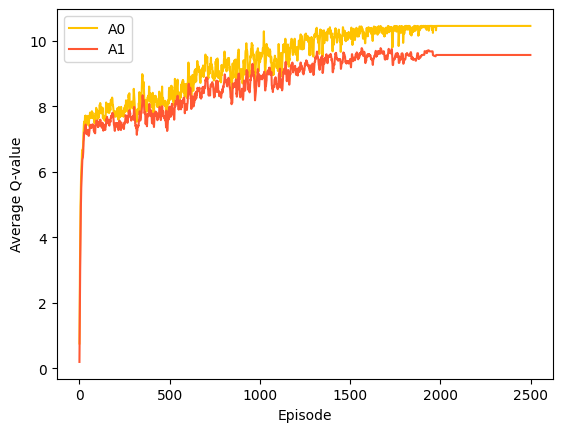

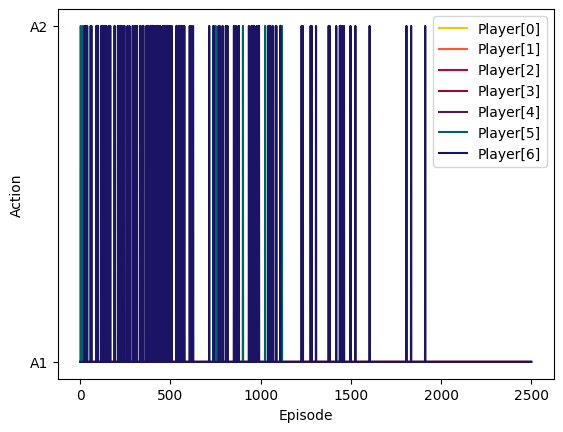

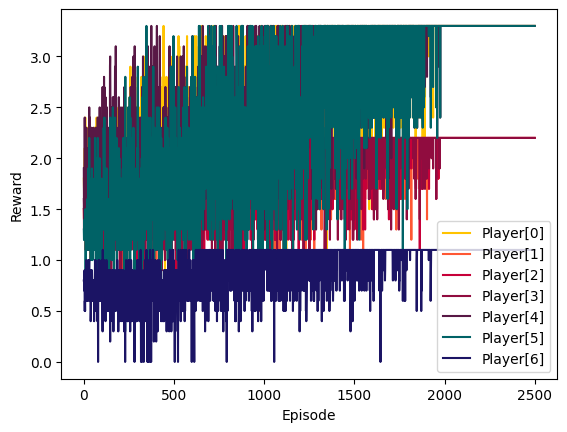

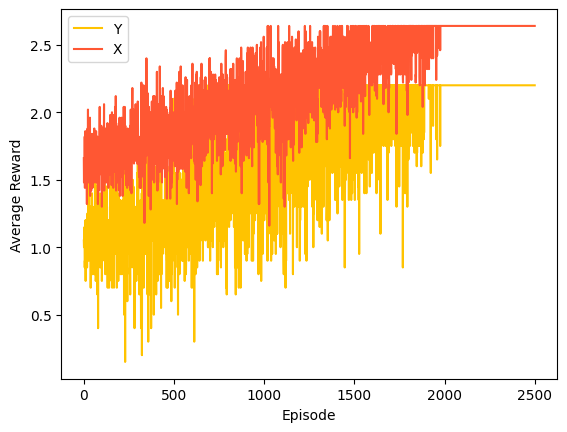

Nash Equilibrium Strategies: 
Player[0]: {type: X, preference: A1, action: A1}
Player[1]: {type: X, preference: A1, action: A1}
Player[2]: {type: X, preference: A1, action: A1}
Player[3]: {type: X, preference: A1, action: A1}
Player[4]: {type: X, preference: A1, action: A1}
Player[5]: {type: Y, preference: A2, action: A1}
Player[6]: {type: Y, preference: A2, action: A1}


In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

# Iterative Coordination Game
actions = ["A1", "A2"]
types = ["X", "X", "X", "X", "X", "Y", "Y"]
payoff = [[1,0],[0,1]]
neighbors = [[0,4],[0,5],[0,3],[1,2],[1,4],[2,3],[4,5],[5,6]]
frequencies = [sum(num in sublist for sublist in neighbors) for num in range(max(max(sublist) for sublist in neighbors) + 1)]  # [0,1,2,3,4,5,6] ~ [3,2,2,2,3,3,1]

def game_print(phase, ep, m, episodes, players_data, pair):

    if phase == "exploration" and m == 10 and ep % int(episodes/4) == 0:
        print("\n" + "*"*50 + '\033[1m' + "\nExploration:" + '\033[0m' + " (pair: {}, episode: {})".format(pair, ep))
        for p in range(len(players_data)):
            print('\033[1m' + players_data[p]["name"] + ":" + '\033[0m' + " {type: " + players_data[p]["type"] + \
            ", preference: " + players_data[p]["preference"] + ", action: " + str(players_data[p]["action"]) + "}")
        time.sleep(0)

    elif phase == "exploitation" and m == 10 and ep % int(episodes/6) == 0:
        print("\n" + "*"*50 + '\033[1m' + "\nExploitation:" + '\033[0m' + " (pair: {}, episode: {})".format(pair, ep))
        for p in range(len(players_data)):
            print('\033[1m' + players_data[p]["name"] + ":" + '\033[0m' + " {type: " + players_data[p]["type"] + \
            ", preference: " + players_data[p]["preference"] + ", action: " + str(players_data[p]["action"]) + "}")
        time.sleep(0)

def graph(x_max, y_ranges, x_label, y_label):
    colours = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', '#006266', '#1B1464']
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    x = [x_value for x_value in range(x_max)]
    if y_label == "Average Q-value":
        for i, y in enumerate(y_ranges):
            plt.plot(x, y, color=colours[i], label=f'A{i}')
        plt.legend()
    elif y_label == "Action":
        y_values = [actions[0], actions[1]]
        plt.yticks(np.arange(0, 2, 1), y_values)
        for i, y in enumerate(y_ranges):
            plt.plot(x, y, color=colours[i], label=f'Player[{i}]')
        plt.legend()
    elif y_label == "Reward":
        for i, y in enumerate(y_ranges):
            plt.plot(x, y, color=colours[i], label=f'Player[{i}]')
        plt.legend()
    elif y_label == "Average Reward":
        for i, y in enumerate(y_ranges):
            plt.plot(x, y, color=colours[i], label=list(set(types))[i])
        plt.legend()
    plt.show()

def string_to_id(string, list):
    if string == list[0]:
        id = 0
    elif string == list[1]:
        id = 1
    return id

def qlearning(players_data):
    moments = 10
    episodes = 2500
    alpha = 0.1
    gamma = 0.9
    epsilon = 1.0
    decay = 0.01
    accuracy = 10

    aqvXep = [[0 for e in range(episodes)] for a in range(len(actions))]
    acXep = [[0 for e in range(episodes)] for p in range(len(players_data))]
    rwXep = [[0 for e in range(episodes)] for p in range(len(players_data))]
    arwXep = [[0 for e in range(episodes)] for t in range(len(set(types)))]

    ep = 0  # episodes counter
    while ep < episodes: 
        for pair in neighbors:
            m = 0  # moments counter
            choice = round(random.uniform(0, 1), accuracy)
            while m <= moments:
                m += 1
                if choice < epsilon :  # EXPLORATION
                    players_data = explore(pair, players_data)
                    aqvXep, acXep, rwXep, arwXep, players_data = update(pair, players_data, alpha, gamma, aqvXep, acXep, rwXep, arwXep, ep, moments)
                    game_print("exploration", ep, m, episodes, players_data, pair)
                else:  # EXPLOITATION
                    players_data = exploit(pair, players_data)
                    aqvXep, acXep, rwXep, arwXep, players_data = update(pair, players_data, alpha, gamma, aqvXep, acXep, rwXep, arwXep, ep, moments)
                    game_print("exploitation", ep, m, episodes, players_data, pair)
        ep = ep + 1
        if epsilon > 0.000000:
            epsilon -= decay/20  # epsilon is reduced by decay every 20 episodes
        else:
            epsilon = 0.000000

    acXep = [[int(num) for num in sublist] for sublist in acXep]
    graph(episodes, aqvXep, "Episode", "Average Q-value")
    graph(episodes, acXep, "Episode", "Action")
    graph(episodes, rwXep, "Episode", "Reward")
    graph(episodes, arwXep, "Episode", "Average Reward")

def update(pair, players_data, alpha, gamma, aqvXep, acXep, rwXep, arwXep, ep, moments):
    for p in pair:
        player_action = players_data[p].get("action")
        player_type = players_data[p].get("type")
        opponent_action = players_data[get_opponent(p, pair)].get("action")
        oldQ = players_data[p].get("qtable")[player_action]
        reward = players_data[p]["payoff"][string_to_id(player_action, actions)][string_to_id(opponent_action, actions)]
        maxQ = max(players_data[p]["qtable"].values())
        newQ = round((1-alpha)*oldQ + alpha*(reward + gamma*maxQ), 2)
        players_data[p].get("qtable")[player_action] = newQ

        for a in range(len(actions)):
            aqvXep[a][ep] += players_data[p].get("qtable")[actions[a]]/(moments*sum(frequencies))
        rwXep[p][ep] += reward/moments
        arwXep[string_to_id(player_type, list(set(types)))][ep] += reward/(moments*types.count(player_type))
        acXep[p][ep] += string_to_id(player_action, actions)/(moments*frequencies[p])   # this value will finally
        # be something like e.x: 0.8 indicating that this player chose A2 (8) times in this current episode
    return aqvXep, acXep, rwXep, arwXep, players_data

def get_opponent(player, pair):
    opponent = pair[0] if player == pair[1] else pair[1]
    return opponent

def explore(pair, players_data):
    for p in pair:
        prob = random.uniform(0, 1)
        if prob < 0.6:
            players_data[p]["action"] = players_data[p]["preference"]
        else:
            random_action = random.choice([actions[0], actions[1]])
            players_data[p]["action"] = random_action
    return players_data

def exploit(pair, players_data):
    for p in pair:
        optimal_action = max(players_data[p]["qtable"], key=players_data[p]["qtable"].get)
        players_data[p]["action"] = optimal_action
    return players_data

def main():
    num_players = 7
    players_data = []
    
    for p in range(num_players):
        players_data.append({
            "name": "Player[{}]".format(p),
            "type": types[p],
            "action": None,
            "preference": actions[0] if types[p] == "X" else actions[1],
            "payoff": payoff,
            "qtable": {actions[0]: 0, actions[1]: 0}
            })

    qlearning(players_data)

    print('\033[1m' + "Nash Equilibrium Strategies: " + '\033[0m')
    for p in range(num_players):
        print('\033[1m' + players_data[p]["name"] + ":" + '\033[0m' + " {type: " + players_data[p]["type"] + \
        ", preference: " + players_data[p]["preference"] + ", action: " + players_data[p]["action"] + "}")
       
if __name__ == "__main__":
    main()